Missing Values in Each Column:
 address                                8760
career_objective                       4804
skills                                   56
educational_institution_name             84
degree_names                             84
passing_years                            84
educational_results                      84
result_types                             84
major_field_of_studies                   84
professional_company_names               84
company_urls                             84
start_dates                              84
end_dates                                84
related_skils_in_job                     84
positions                                84
locations                                84
responsibilities                          0
extra_curricular_activity_types        6118
extra_curricular_organization_names    6118
extra_curricular_organization_links    6118
role_positions                         6118
languages                              8844


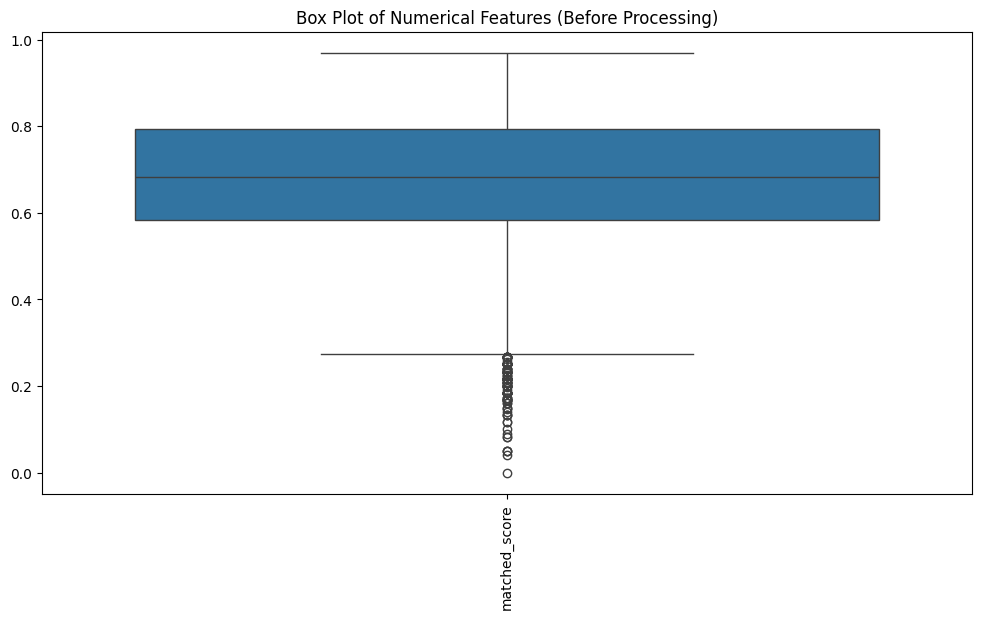

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# -------------------------------
# **STEP 1: LOAD RAW DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK MISSING VALUES**
# -------------------------------
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# -------------------------------
# **STEP 3: DATA TYPES & STATISTICS**
# -------------------------------
print("\nData Types:\n", df.dtypes)
print("\nBasic Statistics Before Preprocessing:\n", df.describe())

# -------------------------------
# **STEP 4: DETECT OUTLIERS USING Z-SCORE**
# -------------------------------
if "matched_score" in df.columns:
    z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
    outliers = (z_scores > 3).sum()
    print("\nOutliers Count (Z-score > 3):\n", outliers)

# -------------------------------
# **STEP 5: VISUALIZATION (BEFORE PROCESSING)**
# -------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Box Plot of Numerical Features (Before Processing)")
plt.xticks(rotation=90)
plt.show()


Columns in dataset: Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

Basic Statistics Before Preprocessing:
 count    9544.000000
mean        0.660831
std         0.167040
min         0.000000
25%         0.

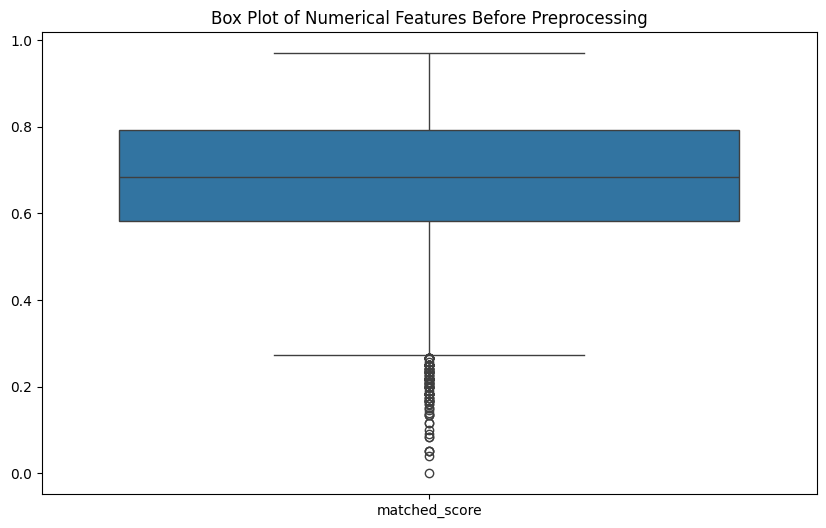

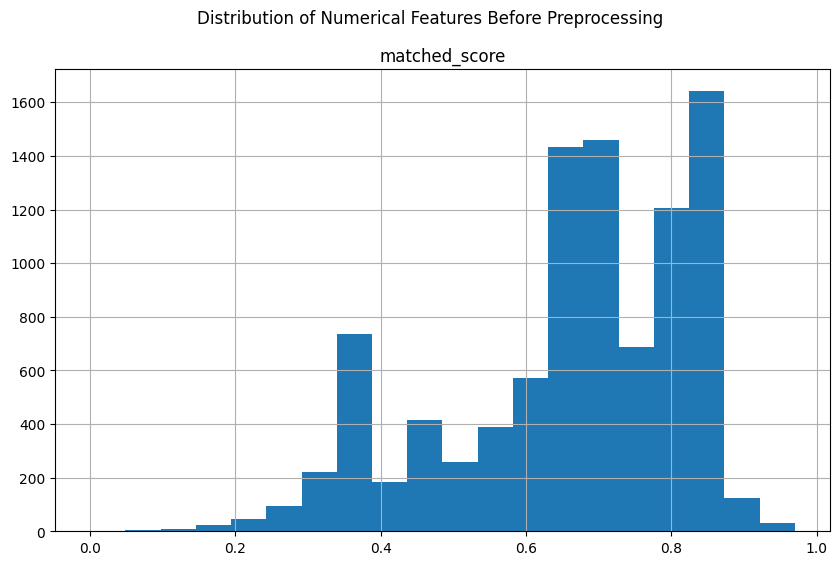


Data Exploration Before Preprocessing:
       matched_score
count    9544.000000
mean        0.660831
std         0.167040
min         0.000000
25%         0.583333
50%         0.683333
75%         0.793333
max         0.970000

Z-Score Before Removing Outliers:
    matched_score   z_score
0       0.850000  1.132540
1       0.750000  0.533848
2       0.416667  1.461790
3       0.760000  0.593718
4       0.650000  0.064843
5       0.850000  1.132540
6       0.650000  0.064843
7       0.650000  0.064843
8       0.550000  0.663535
9       0.383333  1.661354

Basic Statistics After Removing Outliers:
 count    9526.000000
mean        0.661894
std         0.165384
min         0.160000
25%         0.583333
50%         0.683333
75%         0.793333
max         0.970000
Name: matched_score, dtype: float64

Class Distribution After Preprocessing:
 target
0    4870
1    4656
Name: count, dtype: int64


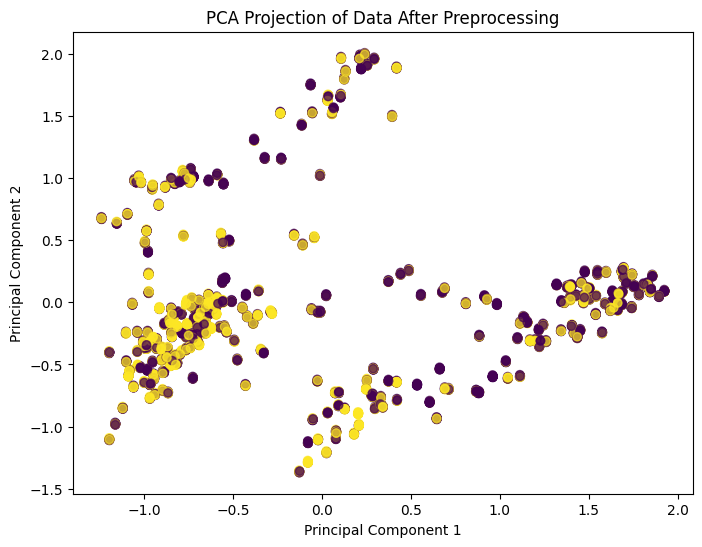


Top 10 Feature Importances:
                                                    importance
locations_['N/A']                                     0.009091
responsibilities.1_Database Design & Developmen...    0.007387
﻿job_position_name_Database Administrator (DBA)       0.006414
educationaL_requirements_Bachelor of Science (B...    0.006084
responsibilities_Database Design & Development\...    0.005431
company_urls_['N/A']                                  0.004982
company_urls_[None, None, None]                       0.004940
experiencere_requirement_1 to 3 years                 0.004851
educationaL_requirements_Bachelor/Honors              0.004780
experiencere_requirement_At least 1 year              0.004623

StandardScaler Applied. Sample values:
   address_1234 Thundar Lane S, Fargo, ND 58102  \
0                                     -0.054295   
1                                     -0.054295   
2                                     -0.054295   
3                                 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv('resume_data.csv')

# Step 1: Display Dataset Information
print("Columns in dataset:", df.columns)

# Step 2: Basic Statistics for Numerical Features
if 'matched_score' in df.columns:
    print("\nBasic Statistics Before Preprocessing:\n", df['matched_score'].describe())

# Step 3: Create Target Column Based on Matched Score
if 'matched_score' in df.columns:
    df['target'] = np.where(df['matched_score'] > df['matched_score'].median(), 1, 0)
    print("\nTarget column added based on matched_score.")

# Step 4: Handling Missing Values
# 4.1. Impute categorical columns with the most frequent value
categorical_columns = ['address', 'career_objective', 'skills', 'educational_institution_name', 
                       'degree_names', 'major_field_of_studies', 'professional_company_names', 
                       'positions', 'languages', 'certification_providers', 'certification_skills']
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

# 4.2. Impute numerical columns with the mean
numerical_columns = ['matched_score']
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Step 5: Data Exploration & Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot of Numerical Features Before Preprocessing')
plt.show()

df[numerical_columns].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distribution of Numerical Features Before Preprocessing')
plt.show()

print("\nData Exploration Before Preprocessing:")
print(df[numerical_columns].describe())

# Step 6: Outlier Detection using Z-Score
df['z_score'] = np.abs(zscore(df[numerical_columns]))

# Display Z-score values before removing outliers
print("\nZ-Score Before Removing Outliers:\n", df[['matched_score', 'z_score']].head(10))

# Remove outliers
df_cleaned = df[df['z_score'] <= 3].copy()
df_cleaned.drop('z_score', axis=1, inplace=True)

# Display updated statistics after removing outliers
print("\nBasic Statistics After Removing Outliers:\n", df_cleaned['matched_score'].describe())

# Step 7: Class Imbalance Check
if 'target' in df_cleaned.columns:
    class_distribution = df_cleaned['target'].value_counts()
    print("\nClass Distribution After Preprocessing:\n", class_distribution)

# Step 8: Feature Analysis & PCA
if 'target' in df_cleaned.columns:
    y = df_cleaned['target']
    X = df_cleaned.drop(columns=['target', 'matched_score'])
    
    # One-hot encoding of categorical features
    X = pd.get_dummies(X, drop_first=True)
    
    # PCA for Feature Extraction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.title('PCA Projection of Data After Preprocessing')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Step 9: Feature Importance using RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
feature_importance = pd.DataFrame(model.feature_importances_,
                                  index=X.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)

print("\nTop 10 Feature Importances:")
print(feature_importance.head(10))

# Step 10: Data Normalization & Scaling
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

scaled_data = {}
for scaler_name, scaler in scalers.items():
    scaled_values = scaler.fit_transform(X)
    scaled_data[scaler_name] = pd.DataFrame(scaled_values, columns=X.columns)
    
    print(f"\n{scaler_name} Applied. Sample values:")
    print(scaled_data[scaler_name].head(10))  # Display first 10 rows of transformed data



print("\nData preprocessing completed successfully!")


In [22]:
import xgboost as xgb
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------------
# **STEP 1: PREPARE DATA FOR TRAINING**
# -------------------------------
X = df_pca  # Processed features (after PCA)
y = df["target"]  # Target column (1 = Matched, 0 = Not Matched)

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# **STEP 2: TRAIN XGBoost MODEL (Optimized Parameters)**
# -------------------------------
xgb_model = xgb.XGBClassifier(
    n_estimators=300,        # More trees for better learning
    learning_rate=0.03,      # Slower learning rate for better accuracy
    max_depth=7,             # Increase depth to capture more patterns
    colsample_bytree=0.8,    # Avoid overfitting by sampling columns
    subsample=0.8,           # Prevent overfitting by sampling rows
    random_state=42,
    eval_metric="logloss"    # Avoid deprecated warnings
)

print("\nTraining XGBoost model...")
xgb_model.fit(X_train, y_train)

# -------------------------------
# **STEP 3: EVALUATE MODEL**
# -------------------------------
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nXGBoost Model Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Training XGBoost model...

XGBoost Model Accuracy: 95.6 %

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1042
           1       0.95      0.96      0.95       867

    accuracy                           0.96      1909
   macro avg       0.96      0.96      0.96      1909
weighted avg       0.96      0.96      0.96      1909



In [13]:
import pandas as pd
import numpy as np
import xgboost as xgb
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK & CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    raise ValueError("Error: No 'matched_score' column found in dataset.")

# -------------------------------
# **STEP 3: ENCODE CATEGORICAL DATA**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 4: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df["target"] = y_resampled
print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 5: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)  # Convert to DataFrame for compatibility
y = df["target"]  # Target variable

# -------------------------------
# **STEP 6: K-FOLD CROSS-VALIDATION (XGBoost)**
# -------------------------------
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
all_class_reports = []

for train_idx, test_idx in kfold.split(X_pca, y):
    X_train, X_test = X_pca.iloc[train_idx], X_pca.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train XGBoost model
    xgb_model = xgb.XGBClassifier(
        n_estimators=300,
        learning_rate=0.03,
        max_depth=7,
        colsample_bytree=0.8,
        subsample=0.8,
        random_state=42,
        eval_metric="logloss"
    )
    xgb_model.fit(X_train, y_train)

    # Evaluate model
    y_pred = xgb_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Store classification report
    all_class_reports.append(classification_report(y_test, y_pred, output_dict=True))

# -------------------------------
# **STEP 7: PRINT FINAL RESULTS**
# -------------------------------
print(f"\nXGBoost Average Accuracy (K-Fold = 5): {np.mean(accuracies) * 100:.2f} %")
print("\nClassification Report (Average over folds):")

# Compute average classification report
final_report = {}
for key in all_class_reports[0].keys():
    if isinstance(all_class_reports[0][key], dict):  # Skip overall accuracy
        final_report[key] = {metric: np.mean([fold[key][metric] for fold in all_class_reports])
                             for metric in all_class_reports[0][key]}

# Print final report
for label, metrics in final_report.items():
    print(f"\nClass {label}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



Target column added based on matched_score.

Class balancing applied using SMOTE.

XGBoost Average Accuracy (K-Fold = 5): 95.27 %

Classification Report (Average over folds):

Class 0:
  precision: 0.9585
  recall: 0.9464
  f1-score: 0.9524
  support: 1015.0000

Class 1:
  precision: 0.9471
  recall: 0.9590
  f1-score: 0.9530
  support: 1015.0000

Class macro avg:
  precision: 0.9528
  recall: 0.9527
  f1-score: 0.9527
  support: 2030.0000

Class weighted avg:
  precision: 0.9528
  recall: 0.9527
  f1-score: 0.9527
  support: 2030.0000


In [27]:
import pandas as pd
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# **STEP 1: LOAD & PREPROCESS DATA**
# -------------------------------
# Load dataset
df = pd.read_csv("resume_data.csv")  # Ensure the correct file is used

# Rename columns to remove special characters (if any)
df.columns = df.columns.str.strip()

# **Identify the target column (change 'matched_score' if incorrect)**
target_column = "matched_score"  
if target_column not in df.columns:
    raise KeyError(f"Column '{target_column}' not found. Available columns: {df.columns}")

# Separate features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert categorical columns to numerical (if needed)
X = pd.get_dummies(X)

# Apply PCA for dimensionality reduction (keeping 95% variance)
pca = PCA(n_components=0.95, random_state=42)
df_pca = pca.fit_transform(X)

# -------------------------------
# **STEP 2: SPLIT DATA**
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

# -------------------------------
# **STEP 3: TRAIN LightGBM MODEL**
# -------------------------------
print("\nTraining LightGBM model...")
lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.1, max_depth=6, verbose=-1)  
lgb_model.fit(X_train, y_train)

# -------------------------------
# **STEP 4: EVALUATE MODEL**
# -------------------------------
y_pred = lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLightGBM Model Accuracy: {accuracy * 100:.2f} %")

print("\nClassification Report:\n", classification_report(y_test, y_pred))



Training LightGBM model...


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [39]:
import catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# **STEP 1: SPLIT DATA**
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_pca, df["target"], test_size=0.2, random_state=42)

# -------------------------------
# **STEP 2: TRAIN CATBOOST MODEL**
# -------------------------------
print("\nTraining CatBoost model...")
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=100)
catboost_model.fit(X_train, y_train)

# -------------------------------
# **STEP 3: EVALUATE MODEL**
# -------------------------------
y_pred = catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nCatBoost Model Accuracy: {accuracy * 100:.2f} %")

print("\nClassification Report:\n", classification_report(y_test, y_pred))



Training CatBoost model...
0:	learn: 0.6345673	total: 10.1ms	remaining: 5.04s
100:	learn: 0.1384396	total: 587ms	remaining: 2.32s
200:	learn: 0.0714535	total: 1.18s	remaining: 1.75s
300:	learn: 0.0427717	total: 1.75s	remaining: 1.16s
400:	learn: 0.0279806	total: 2.33s	remaining: 575ms
499:	learn: 0.0191564	total: 2.9s	remaining: 0us

CatBoost Model Accuracy: 96.75 %

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1042
           1       0.97      0.96      0.96       867

    accuracy                           0.97      1909
   macro avg       0.97      0.97      0.97      1909
weighted avg       0.97      0.97      0.97      1909



In [19]:
import pandas as pd
import numpy as np
import catboost
from catboost import CatBoostClassifier
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK & CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    raise ValueError("Error: No 'matched_score' column found in dataset.")

# -------------------------------
# **STEP 3: ENCODE CATEGORICAL DATA**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 4: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df["target"] = y_resampled
print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 5: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)  # Convert to DataFrame for compatibility
y = df["target"]  # Target variable

# -------------------------------
# **STEP 6: K-FOLD CROSS-VALIDATION (CatBoost)**
# -------------------------------
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
all_class_reports = []

for train_idx, test_idx in kfold.split(X_pca, y):
    X_train, X_test = X_pca.iloc[train_idx], X_pca.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train CatBoost model
    print("\nTraining CatBoost model...")
    catboost_model = CatBoostClassifier(
        iterations=500,
        learning_rate=0.1,
        depth=6,
        verbose=100,
        random_seed=42
    )
    catboost_model.fit(X_train, y_train, verbose=False)

    # Evaluate model
    y_pred = catboost_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Store classification report
    all_class_reports.append(classification_report(y_test, y_pred, output_dict=True))

# -------------------------------
# **STEP 7: PRINT FINAL RESULTS**
# -------------------------------
print(f"\nCatBoost Average Accuracy (K-Fold = 5): {np.mean(accuracies) * 100:.2f} %")
print("\nClassification Report (Average over folds):")

# Compute average classification report
final_report = {}
for key in all_class_reports[0].keys():
    if isinstance(all_class_reports[0][key], dict):  # Skip overall accuracy
        final_report[key] = {metric: np.mean([fold[key][metric] for fold in all_class_reports])
                             for metric in all_class_reports[0][key]}

# Print final report
for label, metrics in final_report.items():
    print(f"\nClass {label}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



Target column added based on matched_score.

Class balancing applied using SMOTE.

Training CatBoost model...

Training CatBoost model...

Training CatBoost model...

Training CatBoost model...

Training CatBoost model...

CatBoost Average Accuracy (K-Fold = 5): 96.84 %

Classification Report (Average over folds):

Class 0:
  precision: 0.9703
  recall: 0.9663
  f1-score: 0.9683
  support: 1015.0000

Class 1:
  precision: 0.9665
  recall: 0.9704
  f1-score: 0.9685
  support: 1015.0000

Class macro avg:
  precision: 0.9684
  recall: 0.9684
  f1-score: 0.9684
  support: 2030.0000

Class weighted avg:
  precision: 0.9684
  recall: 0.9684
  f1-score: 0.9684
  support: 2030.0000


In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK COLUMN NAMES**
# -------------------------------
print("Columns in dataset:", df.columns)

# -------------------------------
# **STEP 3: CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    print("\nNo 'matched_score' column found, skipping target creation.")

# -------------------------------
# **STEP 4: ENCODE CATEGORICAL DATA BEFORE SMOTE**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 5: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
if "target" in df.columns:
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
    df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
    df["target"] = y_resampled
    print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 6: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95)  # Retain 95% variance
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)

# -------------------------------
# **STEP 7: TRAIN TEST SPLIT**
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_pca, df["target"], test_size=0.2, random_state=42)

# -------------------------------
# **STEP 8: TRAIN GRADIENT BOOSTING MODEL**
# -------------------------------
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# -------------------------------
# **STEP 9: EVALUATE MODEL**
# -------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nGradient Boosting Model Accuracy: {accuracy * 100:.2f} %")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Columns in dataset: Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

Target column added based on matched_score.
Encoding column: address
Encoding column: career_objective
Encoding column: skills
Encoding co

In [20]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK & CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    raise ValueError("Error: No 'matched_score' column found in dataset.")

# -------------------------------
# **STEP 3: ENCODE CATEGORICAL DATA**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 4: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df["target"] = y_resampled
print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 5: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)  # Convert to DataFrame for compatibility
y = df["target"]  # Target variable

# -------------------------------
# **STEP 6: K-FOLD CROSS-VALIDATION (Gradient Boosting)**
# -------------------------------
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
all_class_reports = []

for train_idx, test_idx in kfold.split(X_pca, y):
    X_train, X_test = X_pca.iloc[train_idx], X_pca.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train Gradient Boosting model
    print("\nTraining Gradient Boosting model...")
    model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Store classification report
    all_class_reports.append(classification_report(y_test, y_pred, output_dict=True))

# -------------------------------
# **STEP 7: PRINT FINAL RESULTS**
# -------------------------------
print(f"\nGradient Boosting Average Accuracy (K-Fold = 5): {np.mean(accuracies) * 100:.2f} %")
print("\nClassification Report (Average over folds):")

# Compute average classification report
final_report = {}
for key in all_class_reports[0].keys():
    if isinstance(all_class_reports[0][key], dict):  # Skip overall accuracy
        final_report[key] = {metric: np.mean([fold[key][metric] for fold in all_class_reports])
                             for metric in all_class_reports[0][key]}

# Print final report
for label, metrics in final_report.items():
    print(f"\nClass {label}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



Target column added based on matched_score.

Class balancing applied using SMOTE.

Training Gradient Boosting model...

Training Gradient Boosting model...

Training Gradient Boosting model...

Training Gradient Boosting model...

Training Gradient Boosting model...

Gradient Boosting Average Accuracy (K-Fold = 5): 92.52 %

Classification Report (Average over folds):

Class 0:
  precision: 0.9351
  recall: 0.9139
  f1-score: 0.9243
  support: 1015.0000

Class 1:
  precision: 0.9160
  recall: 0.9366
  f1-score: 0.9261
  support: 1015.0000

Class macro avg:
  precision: 0.9255
  recall: 0.9252
  f1-score: 0.9252
  support: 2030.0000

Class weighted avg:
  precision: 0.9255
  recall: 0.9252
  f1-score: 0.9252
  support: 2030.0000


In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK COLUMN NAMES**
# -------------------------------
print("Columns in dataset:", df.columns)

# -------------------------------
# **STEP 3: CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    print("\nNo 'matched_score' column found, skipping target creation.")

# -------------------------------
# **STEP 4: ENCODE CATEGORICAL DATA BEFORE SMOTE**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 5: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
if "target" in df.columns:
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
    df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
    df["target"] = y_resampled
    print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 6: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95)  # Retain 95% variance
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)

# -------------------------------
# **STEP 7: TRAIN TEST SPLIT**
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_pca, df["target"], test_size=0.2, random_state=42)

# -------------------------------
# **STEP 8: TRAIN RANDOM FOREST MODEL**
# -------------------------------
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# -------------------------------
# **STEP 9: EVALUATE MODEL**
# -------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Model Accuracy: {accuracy * 100:.2f} %")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Columns in dataset: Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

Target column added based on matched_score.
Encoding column: address
Encoding column: career_objective
Encoding column: skills
Encoding co

In [21]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK & CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    raise ValueError("Error: No 'matched_score' column found in dataset.")

# -------------------------------
# **STEP 3: ENCODE CATEGORICAL DATA**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 4: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df["target"] = y_resampled
print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 5: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)  # Convert to DataFrame for compatibility
y = df["target"]  # Target variable

# -------------------------------
# **STEP 6: K-FOLD CROSS-VALIDATION (Random Forest)**
# -------------------------------
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
all_class_reports = []

for train_idx, test_idx in kfold.split(X_pca, y):
    X_train, X_test = X_pca.iloc[train_idx], X_pca.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train Random Forest model
    print("\nTraining Random Forest model...")
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Store classification report
    all_class_reports.append(classification_report(y_test, y_pred, output_dict=True))

# -------------------------------
# **STEP 7: PRINT FINAL RESULTS**
# -------------------------------
print(f"\nRandom Forest Average Accuracy (K-Fold = 5): {np.mean(accuracies) * 100:.2f} %")
print("\nClassification Report (Average over folds):")

# Compute average classification report
final_report = {}
for key in all_class_reports[0].keys():
    if isinstance(all_class_reports[0][key], dict):  # Skip overall accuracy
        final_report[key] = {metric: np.mean([fold[key][metric] for fold in all_class_reports])
                             for metric in all_class_reports[0][key]}

# Print final report
for label, metrics in final_report.items():
    print(f"\nClass {label}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



Target column added based on matched_score.

Class balancing applied using SMOTE.

Training Random Forest model...

Training Random Forest model...

Training Random Forest model...

Training Random Forest model...

Training Random Forest model...

Random Forest Average Accuracy (K-Fold = 5): 91.66 %

Classification Report (Average over folds):

Class 0:
  precision: 0.9421
  recall: 0.8877
  f1-score: 0.9140
  support: 1015.0000

Class 1:
  precision: 0.8940
  recall: 0.9454
  f1-score: 0.9189
  support: 1015.0000

Class macro avg:
  precision: 0.9180
  recall: 0.9166
  f1-score: 0.9165
  support: 2030.0000

Class weighted avg:
  precision: 0.9180
  recall: 0.9166
  f1-score: 0.9165
  support: 2030.0000


In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK COLUMN NAMES**
# -------------------------------
print("Columns in dataset:", df.columns)

# -------------------------------
# **STEP 3: CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    print("\nNo 'matched_score' column found, skipping target creation.")

# -------------------------------
# **STEP 4: ENCODE CATEGORICAL DATA BEFORE SMOTE**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 5: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
if "target" in df.columns:
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
    df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
    df["target"] = y_resampled
    print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 6: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95)  # Retain 95% variance
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)

# -------------------------------
# **STEP 7: TRAIN TEST SPLIT**
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_pca, df["target"], test_size=0.2, random_state=42)

# -------------------------------
# **STEP 8: TRAIN LOGISTIC REGRESSION MODEL**
# -------------------------------
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# -------------------------------
# **STEP 9: EVALUATE MODEL**
# -------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Model Accuracy: {accuracy * 100:.2f} %")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Columns in dataset: Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

Target column added based on matched_score.
Encoding column: address
Encoding column: career_objective
Encoding column: skills
Encoding co

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK COLUMN NAMES**
# -------------------------------
print("Columns in dataset:", df.columns)

# -------------------------------
# **STEP 3: CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    print("\nNo 'matched_score' column found, skipping target creation.")

# -------------------------------
# **STEP 4: ENCODE CATEGORICAL DATA BEFORE SMOTE**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 5: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
if "target" in df.columns:
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
    df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
    df["target"] = y_resampled
    print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 6: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95)  # Retain 95% variance
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)

# -------------------------------
# **STEP 7: TRAIN TEST SPLIT**
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_pca, df["target"], test_size=0.2, random_state=42)

# -------------------------------
# **STEP 8: TRAIN SVM MODEL**
# -------------------------------
model = SVC(kernel="rbf", C=1.0, random_state=42)
model.fit(X_train, y_train)

# -------------------------------
# **STEP 9: EVALUATE MODEL**
# -------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSVM Model Accuracy: {accuracy * 100:.2f} %")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Columns in dataset: Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

Target column added based on matched_score.
Encoding column: address
Encoding column: career_objective
Encoding column: skills
Encoding co

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK COLUMN NAMES**
# -------------------------------
print("Columns in dataset:", df.columns)

# -------------------------------
# **STEP 3: CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    print("\nNo 'matched_score' column found, skipping target creation.")

# -------------------------------
# **STEP 4: ENCODE CATEGORICAL DATA BEFORE SMOTE**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 5: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
if "target" in df.columns:
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
    df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
    df["target"] = y_resampled
    print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 6: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95)  # Retain 95% variance
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)

# -------------------------------
# **STEP 7: TRAIN TEST SPLIT**
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_pca, df["target"], test_size=0.2, random_state=42)

# -------------------------------
# **STEP 8: TRAIN EXTRA TREES CLASSIFIER**
# -------------------------------
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -------------------------------
# **STEP 9: EVALUATE MODEL**
# -------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExtra Trees Classifier Accuracy: {accuracy * 100:.2f} %")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Columns in dataset: Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

Target column added based on matched_score.
Encoding column: address
Encoding column: career_objective
Encoding column: skills
Encoding co

In [22]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK & CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    raise ValueError("Error: No 'matched_score' column found in dataset.")

# -------------------------------
# **STEP 3: ENCODE CATEGORICAL DATA**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 4: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df["target"] = y_resampled
print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 5: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)  # Convert to DataFrame for compatibility
y = df["target"]  # Target variable

# -------------------------------
# **STEP 6: K-FOLD CROSS-VALIDATION (Extra Trees Classifier)**
# -------------------------------
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
all_class_reports = []

for train_idx, test_idx in kfold.split(X_pca, y):
    X_train, X_test = X_pca.iloc[train_idx], X_pca.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train Extra Trees Classifier
    print("\nTraining Extra Trees Classifier...")
    model = ExtraTreesClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Store classification report
    all_class_reports.append(classification_report(y_test, y_pred, output_dict=True))

# -------------------------------
# **STEP 7: PRINT FINAL RESULTS**
# -------------------------------
print(f"\nExtra Trees Classifier Average Accuracy (K-Fold = 5): {np.mean(accuracies) * 100:.2f} %")
print("\nClassification Report (Average over folds):")

# Compute average classification report
final_report = {}
for key in all_class_reports[0].keys():
    if isinstance(all_class_reports[0][key], dict):  # Skip overall accuracy
        final_report[key] = {metric: np.mean([fold[key][metric] for fold in all_class_reports])
                             for metric in all_class_reports[0][key]}

# Print final report
for label, metrics in final_report.items():
    print(f"\nClass {label}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



Target column added based on matched_score.

Class balancing applied using SMOTE.

Training Extra Trees Classifier...

Training Extra Trees Classifier...

Training Extra Trees Classifier...

Training Extra Trees Classifier...

Training Extra Trees Classifier...

Extra Trees Classifier Average Accuracy (K-Fold = 5): 92.93 %

Classification Report (Average over folds):

Class 0:
  precision: 0.9433
  recall: 0.9135
  f1-score: 0.9281
  support: 1015.0000

Class 1:
  precision: 0.9162
  recall: 0.9450
  f1-score: 0.9304
  support: 1015.0000

Class macro avg:
  precision: 0.9298
  recall: 0.9293
  f1-score: 0.9292
  support: 2030.0000

Class weighted avg:
  precision: 0.9298
  recall: 0.9293
  f1-score: 0.9292
  support: 2030.0000


In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK COLUMN NAMES**
# -------------------------------
print("Columns in dataset:", df.columns)

# -------------------------------
# **STEP 3: CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    print("\nNo 'matched_score' column found, skipping target creation.")

# -------------------------------
# **STEP 4: ENCODE CATEGORICAL DATA BEFORE SMOTE**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 5: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
if "target" in df.columns:
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
    df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
    df["target"] = y_resampled
    print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 6: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95)  # Retain 95% variance
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)

# -------------------------------
# **STEP 7: TRAIN TEST SPLIT**
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_pca, df["target"], test_size=0.2, random_state=42)

# -------------------------------
# **STEP 8: TRAIN BAGGING CLASSIFIER**
# -------------------------------
base_model = DecisionTreeClassifier(random_state=42)
model = BaggingClassifier(estimator=base_model, n_estimators=100, random_state=42)  # ✅ Fixed parameter
model.fit(X_train, y_train)

# -------------------------------
# **STEP 9: EVALUATE MODEL**
# -------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nBagging Classifier Accuracy: {accuracy * 100:.2f} %")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Columns in dataset: Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

Target column added based on matched_score.
Encoding column: address
Encoding column: career_objective
Encoding column: skills
Encoding co

In [23]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK & CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    raise ValueError("Error: No 'matched_score' column found in dataset.")

# -------------------------------
# **STEP 3: ENCODE CATEGORICAL DATA**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 4: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df["target"] = y_resampled
print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 5: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)  # Convert to DataFrame for compatibility
y = df["target"]  # Target variable

# -------------------------------
# **STEP 6: K-FOLD CROSS-VALIDATION (Bagging Classifier)**
# -------------------------------
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
all_class_reports = []

for train_idx, test_idx in kfold.split(X_pca, y):
    X_train, X_test = X_pca.iloc[train_idx], X_pca.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train Bagging Classifier with Decision Tree
    print("\nTraining Bagging Classifier...")
    base_model = DecisionTreeClassifier(random_state=42)
    model = BaggingClassifier(estimator=base_model, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Store classification report
    all_class_reports.append(classification_report(y_test, y_pred, output_dict=True))

# -------------------------------
# **STEP 7: PRINT FINAL RESULTS**
# -------------------------------
print(f"\nBagging Classifier Average Accuracy (K-Fold = 5): {np.mean(accuracies) * 100:.2f} %")
print("\nClassification Report (Average over folds):")

# Compute average classification report
final_report = {}
for key in all_class_reports[0].keys():
    if isinstance(all_class_reports[0][key], dict):  # Skip overall accuracy
        final_report[key] = {metric: np.mean([fold[key][metric] for fold in all_class_reports])
                             for metric in all_class_reports[0][key]}

# Print final report
for label, metrics in final_report.items():
    print(f"\nClass {label}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



Target column added based on matched_score.

Class balancing applied using SMOTE.

Training Bagging Classifier...

Training Bagging Classifier...

Training Bagging Classifier...

Training Bagging Classifier...

Training Bagging Classifier...

Bagging Classifier Average Accuracy (K-Fold = 5): 91.98 %

Classification Report (Average over folds):

Class 0:
  precision: 0.9261
  recall: 0.9125
  f1-score: 0.9192
  support: 1015.0000

Class 1:
  precision: 0.9139
  recall: 0.9271
  f1-score: 0.9204
  support: 1015.0000

Class macro avg:
  precision: 0.9200
  recall: 0.9198
  f1-score: 0.9198
  support: 2030.0000

Class weighted avg:
  precision: 0.9200
  recall: 0.9198
  f1-score: 0.9198
  support: 2030.0000


In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK COLUMN NAMES**
# -------------------------------
print("Columns in dataset:", df.columns)

# -------------------------------
# **STEP 3: CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    print("\nNo 'matched_score' column found, skipping target creation.")

# -------------------------------
# **STEP 4: ENCODE CATEGORICAL DATA BEFORE SMOTE**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 5: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
if "target" in df.columns:
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
    df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
    df["target"] = y_resampled
    print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 6: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95)  # Retain 95% variance
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)

# -------------------------------
# **STEP 7: TRAIN TEST SPLIT**
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_pca, df["target"], test_size=0.2, random_state=42)

# -------------------------------
# **STEP 8: TRAIN ADABOOST CLASSIFIER**
# -------------------------------
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)  # Weak learner
model = AdaBoostClassifier(estimator=base_model, n_estimators=100, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)

# -------------------------------
# **STEP 9: EVALUATE MODEL**
# -------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAdaBoost Classifier Accuracy: {accuracy * 100:.2f} %")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Columns in dataset: Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

Target column added based on matched_score.
Encoding column: address
Encoding column: career_objective
Encoding column: skills
Encoding co

In [24]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK & CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    raise ValueError("Error: No 'matched_score' column found in dataset.")

# -------------------------------
# **STEP 3: ENCODE CATEGORICAL DATA**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 4: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df["target"] = y_resampled
print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 5: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)  # Convert to DataFrame for compatibility
y = df["target"]  # Target variable

# -------------------------------
# **STEP 6: K-FOLD CROSS-VALIDATION (AdaBoost Classifier)**
# -------------------------------
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
all_class_reports = []

for train_idx, test_idx in kfold.split(X_pca, y):
    X_train, X_test = X_pca.iloc[train_idx], X_pca.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train AdaBoost Classifier with Decision Tree as base estimator
    print("\nTraining AdaBoost Classifier...")
    base_model = DecisionTreeClassifier(max_depth=1, random_state=42)  # Weak learner
    model = AdaBoostClassifier(estimator=base_model, n_estimators=100, learning_rate=1.0, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Store classification report
    all_class_reports.append(classification_report(y_test, y_pred, output_dict=True))

# -------------------------------
# **STEP 7: PRINT FINAL RESULTS**
# -------------------------------
print(f"\nAdaBoost Classifier Average Accuracy (K-Fold = 5): {np.mean(accuracies) * 100:.2f} %")
print("\nClassification Report (Average over folds):")

# Compute average classification report
final_report = {}
for key in all_class_reports[0].keys():
    if isinstance(all_class_reports[0][key], dict):  # Skip overall accuracy
        final_report[key] = {metric: np.mean([fold[key][metric] for fold in all_class_reports])
                             for metric in all_class_reports[0][key]}

# Print final report
for label, metrics in final_report.items():
    print(f"\nClass {label}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



Target column added based on matched_score.

Class balancing applied using SMOTE.

Training AdaBoost Classifier...


C:\Users\786sh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Training AdaBoost Classifier...


C:\Users\786sh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Training AdaBoost Classifier...


C:\Users\786sh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Training AdaBoost Classifier...


C:\Users\786sh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Training AdaBoost Classifier...


C:\Users\786sh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Classifier Average Accuracy (K-Fold = 5): 94.94 %

Classification Report (Average over folds):

Class 0:
  precision: 0.9497
  recall: 0.9490
  f1-score: 0.9493
  support: 1015.0000

Class 1:
  precision: 0.9491
  recall: 0.9498
  f1-score: 0.9494
  support: 1015.0000

Class macro avg:
  precision: 0.9494
  recall: 0.9494
  f1-score: 0.9494
  support: 2030.0000

Class weighted avg:
  precision: 0.9494
  recall: 0.9494
  f1-score: 0.9494
  support: 2030.0000


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK COLUMN NAMES**
# -------------------------------
print("Columns in dataset:", df.columns)

# -------------------------------
# **STEP 3: CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    print("\nNo 'matched_score' column found, skipping target creation.")

# -------------------------------
# **STEP 4: ENCODE CATEGORICAL DATA BEFORE SMOTE**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 5: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
if "target" in df.columns:
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
    df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
    df["target"] = y_resampled
    print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 6: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95)  # Retain 95% variance
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)

# -------------------------------
# **STEP 7: TRAIN TEST SPLIT**
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_pca, df["target"], test_size=0.2, random_state=42)

# -------------------------------
# **STEP 8: TRAIN VOTING CLASSIFIER**
# -------------------------------
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model3 = SVC(kernel="rbf", probability=True, random_state=42)

voting_model = VotingClassifier(
    estimators=[
        ("RandomForest", model1),
        ("GradientBoost", model2),
        ("SVM", model3)
    ],
    voting="soft"  # Change to "hard" for majority voting
)

voting_model.fit(X_train, y_train)

# -------------------------------
# **STEP 9: EVALUATE MODEL**
# -------------------------------
y_pred = voting_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nVoting Classifier Accuracy: {accuracy * 100:.2f} %")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Columns in dataset: Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

Target column added based on matched_score.
Encoding column: address
Encoding column: career_objective
Encoding column: skills
Encoding co

In [25]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK & CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    raise ValueError("Error: No 'matched_score' column found in dataset.")

# -------------------------------
# **STEP 3: ENCODE CATEGORICAL DATA**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 4: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df["target"] = y_resampled
print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 5: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)  # Convert to DataFrame for compatibility
y = df["target"]  # Target variable

# -------------------------------
# **STEP 6: K-FOLD CROSS-VALIDATION (Voting Classifier)**
# -------------------------------
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
all_class_reports = []

for train_idx, test_idx in kfold.split(X_pca, y):
    X_train, X_test = X_pca.iloc[train_idx], X_pca.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Define classifiers
    model1 = RandomForestClassifier(n_estimators=100, random_state=42)
    model2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
    model3 = SVC(kernel="rbf", probability=True, random_state=42)

    # Create Voting Classifier
    voting_model = VotingClassifier(
        estimators=[
            ("RandomForest", model1),
            ("GradientBoost", model2),
            ("SVM", model3)
        ],
        voting="soft"  # Change to "hard" for majority voting
    )

    # Train model
    print("\nTraining Voting Classifier...")
    voting_model.fit(X_train, y_train)

    # Evaluate model
    y_pred = voting_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Store classification report
    all_class_reports.append(classification_report(y_test, y_pred, output_dict=True))

# -------------------------------
# **STEP 7: PRINT FINAL RESULTS**
# -------------------------------
print(f"\nVoting Classifier Average Accuracy (K-Fold = 5): {np.mean(accuracies) * 100:.2f} %")
print("\nClassification Report (Average over folds):")

# Compute average classification report
final_report = {}
for key in all_class_reports[0].keys():
    if isinstance(all_class_reports[0][key], dict):  # Skip overall accuracy
        final_report[key] = {metric: np.mean([fold[key][metric] for fold in all_class_reports])
                             for metric in all_class_reports[0][key]}

# Print final report
for label, metrics in final_report.items():
    print(f"\nClass {label}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



Target column added based on matched_score.

Class balancing applied using SMOTE.

Training Voting Classifier...

Training Voting Classifier...

Training Voting Classifier...

Training Voting Classifier...

Training Voting Classifier...

Voting Classifier Average Accuracy (K-Fold = 5): 97.46 %

Classification Report (Average over folds):

Class 0:
  precision: 0.9795
  recall: 0.9695
  f1-score: 0.9744
  support: 1015.0000

Class 1:
  precision: 0.9698
  recall: 0.9797
  f1-score: 0.9747
  support: 1015.0000

Class macro avg:
  precision: 0.9747
  recall: 0.9746
  f1-score: 0.9746
  support: 2030.0000

Class weighted avg:
  precision: 0.9747
  recall: 0.9746
  f1-score: 0.9746
  support: 2030.0000


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK COLUMN NAMES**
# -------------------------------
print("Columns in dataset:", df.columns)

# -------------------------------
# **STEP 3: CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    print("\nNo 'matched_score' column found, skipping target creation.")

# -------------------------------
# **STEP 4: ENCODE CATEGORICAL DATA BEFORE SMOTE**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 5: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
if "target" in df.columns:
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
    df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
    df["target"] = y_resampled
    print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 6: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95)  # Retain 95% variance
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)

# -------------------------------
# **STEP 7: TRAIN TEST SPLIT**
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_pca, df["target"], test_size=0.2, random_state=42)

# -------------------------------
# **STEP 8: DEFINE BASE LEARNERS & META-LEARNER**
# -------------------------------
base_learners = [
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("gb", GradientBoostingClassifier(n_estimators=100, random_state=42))
]

meta_learner = LogisticRegression()

# -------------------------------
# **STEP 9: TRAIN STACKING CLASSIFIER**
# -------------------------------
model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
model.fit(X_train, y_train)

# -------------------------------
# **STEP 10: EVALUATE MODEL**
# -------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nStacking Classifier Model Accuracy: {accuracy * 100:.2f} %")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Columns in dataset: Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

Target column added based on matched_score.
Encoding column: address
Encoding column: career_objective
Encoding column: skills
Encoding co

In [26]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK & CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    raise ValueError("Error: No 'matched_score' column found in dataset.")

# -------------------------------
# **STEP 3: ENCODE CATEGORICAL DATA**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 4: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df["target"] = y_resampled
print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 5: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)  # Convert to DataFrame for compatibility
y = df["target"]  # Target variable

# -------------------------------
# **STEP 6: K-FOLD CROSS-VALIDATION (Stacking Classifier)**
# -------------------------------
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
all_class_reports = []

for train_idx, test_idx in kfold.split(X_pca, y):
    X_train, X_test = X_pca.iloc[train_idx], X_pca.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Define base learners
    base_learners = [
        ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
        ("gb", GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]

    # Define meta-learner
    meta_learner = LogisticRegression()

    # Create Stacking Classifier
    stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

    # Train model
    print("\nTraining Stacking Classifier...")
    stacking_model.fit(X_train, y_train)

    # Evaluate model
    y_pred = stacking_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Store classification report
    all_class_reports.append(classification_report(y_test, y_pred, output_dict=True))

# -------------------------------
# **STEP 7: PRINT FINAL RESULTS**
# -------------------------------
print(f"\nStacking Classifier Average Accuracy (K-Fold = 5): {np.mean(accuracies) * 100:.2f} %")
print("\nClassification Report (Average over folds):")

# Compute average classification report
final_report = {}
for key in all_class_reports[0].keys():
    if isinstance(all_class_reports[0][key], dict):  # Skip overall accuracy
        final_report[key] = {metric: np.mean([fold[key][metric] for fold in all_class_reports])
                             for metric in all_class_reports[0][key]}

# Print final report
for label, metrics in final_report.items():
    print(f"\nClass {label}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



Target column added based on matched_score.

Class balancing applied using SMOTE.

Training Stacking Classifier...

Training Stacking Classifier...

Training Stacking Classifier...

Training Stacking Classifier...

Training Stacking Classifier...

Stacking Classifier Average Accuracy (K-Fold = 5): 93.60 %

Classification Report (Average over folds):

Class 0:
  precision: 0.9394
  recall: 0.9320
  f1-score: 0.9357
  support: 1015.0000

Class 1:
  precision: 0.9327
  recall: 0.9399
  f1-score: 0.9363
  support: 1015.0000

Class macro avg:
  precision: 0.9360
  recall: 0.9360
  f1-score: 0.9360
  support: 2030.0000

Class weighted avg:
  precision: 0.9360
  recall: 0.9360
  f1-score: 0.9360
  support: 2030.0000


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK COLUMN NAMES**
# -------------------------------
print("Columns in dataset:", df.columns)

# -------------------------------
# **STEP 3: CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    print("\nNo 'matched_score' column found, skipping target creation.")

# -------------------------------
# **STEP 4: ENCODE CATEGORICAL DATA BEFORE SMOTE**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 5: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
if "target" in df.columns:
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
    df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
    df["target"] = y_resampled
    print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 6: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95)  # Retain 95% variance
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)

# -------------------------------
# **STEP 7: TRAIN TEST SPLIT**
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_pca, df["target"], test_size=0.2, random_state=42)

# -------------------------------
# **STEP 8: TRAIN KNN CLASSIFIER**
# -------------------------------
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # k=5 with Euclidean distance
model.fit(X_train, y_train)

# -------------------------------
# **STEP 9: EVALUATE MODEL**
# -------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nKNN Model Accuracy: {accuracy * 100:.2f} %")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Columns in dataset: Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

Target column added based on matched_score.
Encoding column: address
Encoding column: career_objective
Encoding column: skills
Encoding co

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# **STEP 1: LOAD DATA**
# -------------------------------
file_path = "resume_data.csv"  # Change to your file path
df = pd.read_csv(file_path)

# -------------------------------
# **STEP 2: CHECK COLUMN NAMES**
# -------------------------------
print("Columns in dataset:", df.columns)

# -------------------------------
# **STEP 3: CREATE TARGET COLUMN**
# -------------------------------
if "matched_score" in df.columns:
    df["target"] = df["matched_score"].apply(lambda x: 1 if x >= 0.7 else 0)
    print("\nTarget column added based on matched_score.")
else:
    print("\nNo 'matched_score' column found, skipping target creation.")

# -------------------------------
# **STEP 4: ENCODE CATEGORICAL DATA BEFORE SMOTE**
# -------------------------------
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# -------------------------------
# **STEP 5: HANDLE CLASS IMBALANCE (SMOTE)**
# -------------------------------
if "target" in df.columns:
    smote = SMOTE(sampling_strategy="auto", random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=["target"]), df["target"])
    df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
    df["target"] = y_resampled
    print("\nClass balancing applied using SMOTE.")

# -------------------------------
# **STEP 6: FEATURE SCALING & PCA**
# -------------------------------
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["target"]))

pca = PCA(n_components=0.95)  # Retain 95% variance
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)

# -------------------------------
# **STEP 7: TRAIN TEST SPLIT**
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(df_pca, df["target"], test_size=0.2, random_state=42)

# -------------------------------
# **STEP 8: TRAIN MLP CLASSIFIER**
# -------------------------------
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation="relu", solver="adam", max_iter=500, random_state=42)
model.fit(X_train, y_train)

# -------------------------------
# **STEP 9: EVALUATE MODEL**
# -------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nMLPClassifier (Neural Network) Accuracy: {accuracy * 100:.2f} %")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Columns in dataset: Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')

Target column added based on matched_score.
Encoding column: address
Encoding column: career_objective
Encoding column: skills
Encoding co